Applications of AutoEncoder

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Adding an extra autoencoder layer
encoded2 = Dense(encoding_dim, activation= 'relu')(encoded)
# Adding an extra decoder layer to encounter encoded layer
decoded2 = Dense(784, activation='sigmoid')(encoded2)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(decoded2)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/50
235/235 [==============================] - 12s 45ms/step - loss: 0.7325 - val_loss: 0.7295
Epoch 2/50
235/235 [==============================] - 9s 36ms/step - loss: 0.7266 - val_loss: 0.7237
Epoch 3/50
235/235 [==============================] - 10s 42ms/step - loss: 0.7209 - val_loss: 0.7181
Epoch 4/50
235/235 [==============================] - 10s 43ms/step - loss: 0.7153 - val_loss: 0.7126
Epoch 5/50
235/235 [==============================] - 9s 40ms/step - loss: 0.7098 - val_loss: 0.7072
Epoch 6/50
235/235 [==============================] - 9s 38ms/step - loss: 0.7045 - val_loss: 0.7020
Epoch 7/50
235/235 [==============================] - 10s 44ms/step - loss: 0.6994 - val_loss: 0.6969
Epoch 8/50
235/235 [==============================] - 12s 52ms/step - loss: 0.6944 - val_loss: 0.6920
Epoch 9/50
235/235 [==============================] - 9s 37ms/step - loss: 0.6895 - val_loss: 0.6872
Epoch 10/50
235/235 [==

2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.Also, visualize the same test data before reconstruction using Matplotlib

Epoch 1/15
235/235 [==============================] - 6s 20ms/step - loss: 0.3860 - val_loss: 0.3243
Epoch 2/15
235/235 [==============================] - 5s 21ms/step - loss: 0.3092 - val_loss: 0.3037
Epoch 3/15
235/235 [==============================] - 4s 17ms/step - loss: 0.2982 - val_loss: 0.2984
Epoch 4/15
235/235 [==============================] - 3s 12ms/step - loss: 0.2927 - val_loss: 0.2928
Epoch 5/15
235/235 [==============================] - 3s 12ms/step - loss: 0.2890 - val_loss: 0.2899
Epoch 6/15
235/235 [==============================] - 3s 13ms/step - loss: 0.2864 - val_loss: 0.2877
Epoch 7/15
235/235 [==============================] - 4s 19ms/step - loss: 0.2845 - val_loss: 0.2859
Epoch 8/15
235/235 [==============================] - 3s 12ms/step - loss: 0.2830 - val_loss: 0.2845
Epoch 9/15
235/235 [==============================] - 3s 13ms/step - loss: 0.2817 - val_loss: 0.2832
Epoch 10/15
235/235 [==============================] - 3s 12ms/step - loss: 0.2805 - val_lo

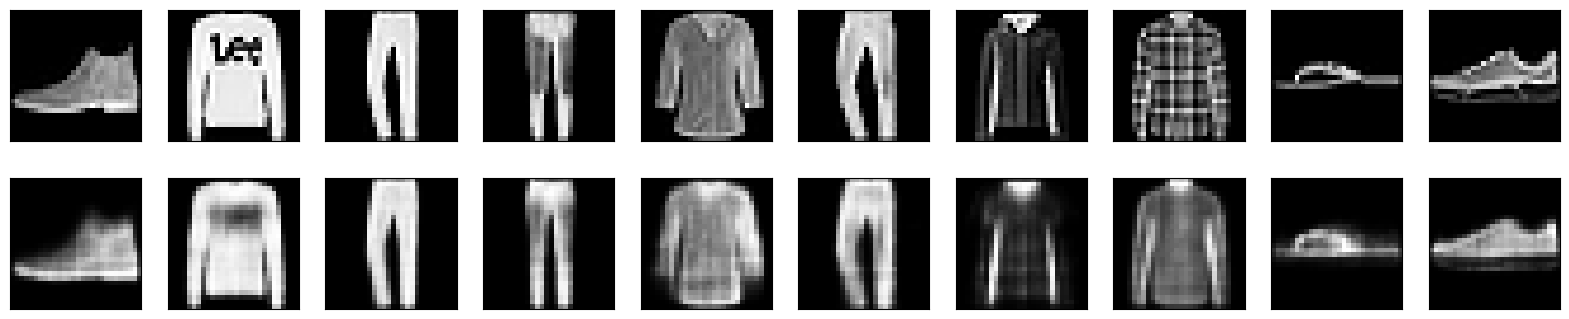

In [3]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# model architecture
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
hidden_layer = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_layer)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Training with callbacks
autoencoder.fit(x_train, x_train,
                epochs=15,                  # Increased epochs for deeper model
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict on the test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed data
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

3. Repeat the question 2 on the denoisening autoencoder


Epoch 1/20
235/235 [==============================] - 4s 13ms/step - loss: 0.4034 - val_loss: 0.3393
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 0.3291 - val_loss: 0.3254
Epoch 3/20
235/235 [==============================] - 4s 15ms/step - loss: 0.3193 - val_loss: 0.3189
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3137 - val_loss: 0.3142
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3099 - val_loss: 0.3112
Epoch 6/20
235/235 [==============================] - 3s 14ms/step - loss: 0.3071 - val_loss: 0.3091
Epoch 7/20
235/235 [==============================] - 4s 16ms/step - loss: 0.3051 - val_loss: 0.3077
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3035 - val_loss: 0.3056
Epoch 9/20
235/235 [==============================] - 3s 13ms/step - loss: 0.3025 - val_loss: 0.3046
Epoch 10/20
235/235 [==============================] - 4s 15ms/step - loss: 0.3013 - val_lo

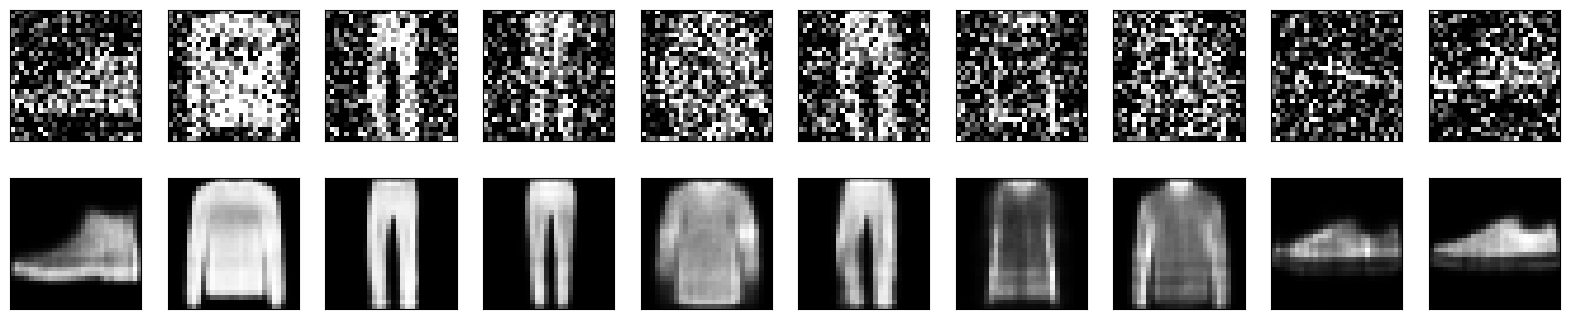

In [8]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


# Model architecture with regularization
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
hidden_layer = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_layer)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Noise introduction
noise_factor = 0.5 # You can adjust this for more/less noise
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the model
autoencoder.fit(x_train_noisy, x_train,  # Train on noisy input, target is clean
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Predict on the noisy test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize the noisy input and the reconstructed data
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy input
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

4. plot loss and accuracy using the history object

Epoch 1/10
235/235 [==============================] - 6s 19ms/step - loss: 0.6328 - accuracy: 0.7869 - val_loss: 0.4942 - val_accuracy: 0.8274
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.4304 - accuracy: 0.8522 - val_loss: 0.4364 - val_accuracy: 0.8482
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.3855 - accuracy: 0.8661 - val_loss: 0.4018 - val_accuracy: 0.8577
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.3582 - accuracy: 0.8749 - val_loss: 0.3844 - val_accuracy: 0.8623
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.3422 - accuracy: 0.8795 - val_loss: 0.4132 - val_accuracy: 0.8537
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3193 - accuracy: 0.8865 - val_loss: 0.3561 - val_accuracy: 0.8732
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3097 - accuracy: 0.8883 - val_loss: 0.3602 - val_accuracy: 0.8687
E

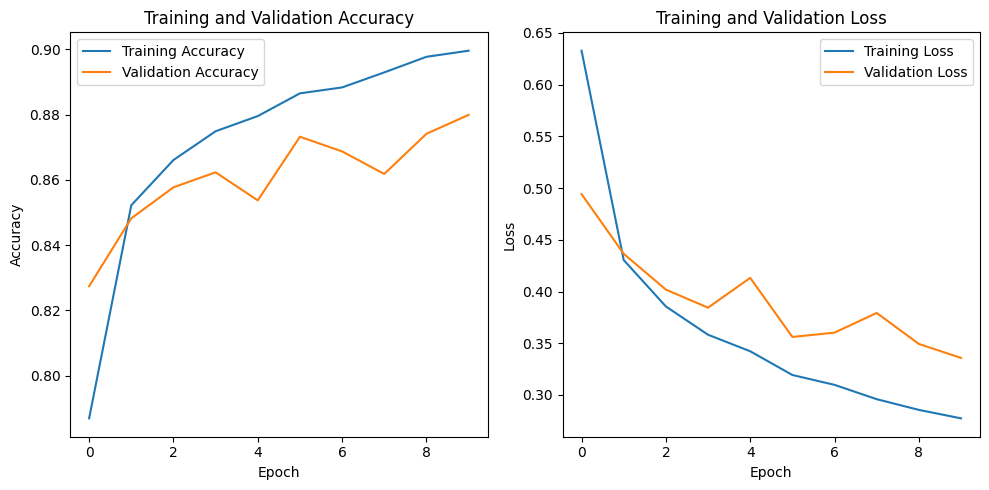

In [9]:

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# Load and prepare the Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Model architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(10, activation='softmax')(encoded)  # Classification layer

model = Model(input_img, decoded)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, y_test))
# Plotting the training and validation loss
plt.figure(figsize=(10, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()